In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 加载MNIST数据集
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


In [3]:

# 定义欠完备自编码器模型
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Linear(28*28, 64)  # 输入层28×28个神经元 -> 隐含层8×8个神经元
        self.decoder = nn.Linear(64, 28*28)  # 隐含层8×8个神经元 -> 输出层28×28个神经元

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.encoder(x)
        x = self.decoder(x)
        x = x.view(x.size(0), 1, 28, 28)
        return x

# 实例化欠完备自编码器模型
autoencoder = Autoencoder()

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.001)

# 训练欠完备自编码器
for epoch in range(10):
    running_loss = 0.0
    for data in trainloader:
        inputs, _ = data
        optimizer.zero_grad()
        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss / len(trainloader)}")

Epoch 1, Loss: 0.02076217299823695
Epoch 2, Loss: 0.010134859527868313
Epoch 3, Loss: 0.009554789246701355
Epoch 4, Loss: 0.00949325352839665
Epoch 5, Loss: 0.009486966731666184
Epoch 6, Loss: 0.009474638343127425
Epoch 7, Loss: 0.00946130996236383
Epoch 8, Loss: 0.009454996045083125
Epoch 9, Loss: 0.00946445627185677
Epoch 10, Loss: 0.009455758345517904


In [4]:
# 显示输入数据、编码后的数据和解码后的数据
inputs, _ = next(iter(trainloader))
encoded = autoencoder.encoder(inputs.view(-1, 28*28))
decoded = autoencoder(inputs)


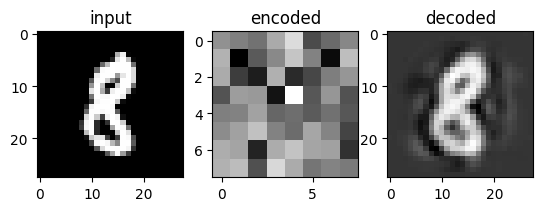

In [34]:
i=27

it = inputs[i,0,:,:].detach().numpy()
ed = encoded[i,:].detach().numpy()
dd = decoded[i,0,:,:].detach().numpy()

#原图像
plt.subplot(1,3,1)
plt.imshow(it, cmap='Greys_r')
plt.title("input")

#编码图
plt.subplot(1,3,2)
plt.imshow(ed.reshape(8,8), cmap='Greys_r')
plt.title("encoded")

#解码图
plt.subplot(1,3,3)
plt.imshow(dd, cmap='Greys_r')
plt.title("decoded")

plt.show()


In [79]:
fig, axes = plt.subplots(nrows=3, ncols=5)
for i in range(4):

    it = inputs[i,0,:,:].detach().numpy()
    ed = encoded[i,:].detach().numpy()
    dd = decoded[i,0,:,:].detach().numpy()

    #原图像
    for img, ax in zip(it, axes[0]):
        ax.imshow(img, cmap='Greys_r')
        plt.title("input")

    #编码图
    for img, ax in zip(ed, axes[1]):
        plt.title("encoded")

    #解码图
    for img, ax in zip(dd, axes[2]):
        plt.title("decoded")
        

plt.show()

SyntaxError: invalid syntax (3786368935.py, line 2)

In [ ]:

def show_images(input, encoded, decoded):
    input = input.detach().numpy()
    encoded = encoded.detach().numpy()
    decoded = decoded.detach().numpy()
    
    fig, axes = plt.subplots(nrows=3, ncols=10, sharex=True, sharey=True, figsize=(20, 6))
'''
    for images, row in zip([input, encoded, decoded], axes):
        for img, ax in zip(images, row):
            ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)'''

fig.tight_layout(pad=0.1)

show_images(inputs, encoded.view(-1, 8, 8), decoded.view(-1, 28, 28))
plt.show()

In [ ]:
def show_images(input, encoded, decoded):
    input = input.detach().numpy()
    encoded = encoded.detach().numpy()
    decoded = decoded.detach().numpy()

    fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 6))

    for img, ax in zip(input, axes[0]):
        ax.imshow(img, cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    for img, ax in zip(encoded, axes[1]):
        ax.imshow(img, cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    for img, ax in zip(decoded, axes[2]):
        ax.imshow(img, cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    fig.tight_layout(pad=0.1)

show_images(inputs, encoded, decoded)
plt.show()

In [83]:
# 获取自编码器模型的编码器部分
encoder = autoencoder.encoder
# 获取输入层到隐含层的权重参数
input_to_hidden_weights = encoder.state_dict()['weight']

print(input_to_hidden_weights)

tensor([[ 2.1189e-02, -1.2101e-02,  6.6696e-03,  ..., -2.6003e-02,
         -1.9760e-02, -5.4431e-03],
        [-8.6134e-03, -1.9795e-02, -3.5045e-02,  ...,  2.1108e-02,
         -1.7733e-03,  2.8077e-02],
        [ 2.8200e-03, -1.9115e-02, -2.0766e-02,  ..., -1.9777e-02,
          8.6565e-05, -1.0837e-02],
        ...,
        [ 4.7987e-03,  3.2179e-02,  2.2448e-02,  ..., -1.7724e-02,
         -3.9314e-03, -1.9581e-02],
        [ 2.7859e-02,  3.2240e-02,  4.6959e-03,  ...,  8.6013e-03,
          2.8493e-02,  2.3925e-02],
        [ 4.3335e-03,  2.3968e-02, -3.4432e-02,  ..., -1.2789e-02,
         -2.6241e-03,  1.8845e-02]])
